In [1]:
!pip install pymysql

In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [3]:
# 폰트 오류 안 나게
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
db = pymysql.connect(host='localhost', port=3306, user='root', passwd='second45631!', db='olist_marketing', charset='utf8')

In [5]:
cur = db.cursor()

###### 거래 체결기간이 -2인 행 삭제

-- DISABLE SAFE MODE(safe mode 비활성화)

SET SQL_SAFE_UPDATES = 0;
DELETE FROM olist_closed_deals WHERE mql_id = 'b91cf8812365f50ff4bda4bcd6206b05';

-- ENABLE SAFE MODE(safe mode 활성화)

SET SQL_SAFE_UPDATES = 1; 

In [7]:
query = '''
SELECT D.mql_id
	, DATEDIFF(D.won_date,M.first_contact_date) AS day
FROM olist_marketing.olist_closed_deals D
JOIN olist_marketing.olist_marketing_qualified_leads M ON M.mql_id = D.mql_id; 
'''
df = pd.read_sql_query(query, con=db)
df = pd.DataFrame(deal)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_11912\4137867657.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, con=db)


{'whiskers': [<matplotlib.lines.Line2D at 0x2349e543910>,
 'caps': [<matplotlib.lines.Line2D at 0x2349ddbd490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2349d85d610>],
 'medians': [<matplotlib.lines.Line2D at 0x2349e5716d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2349e571d10>],
 'means': []}

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

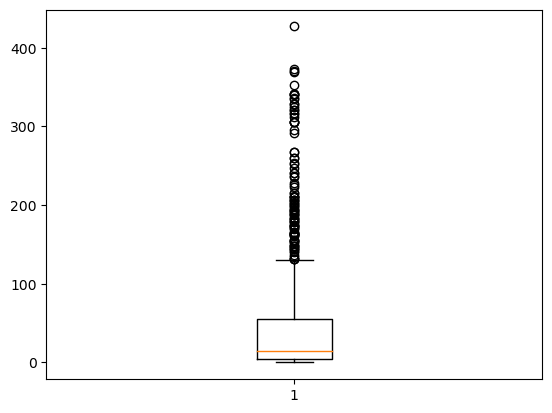

In [10]:
plt.boxplot(df.day)

### 거래체결기간 
- 거래체결기간 A: 0 - 49일 B: 50일 - 427일

In [7]:
query = '''
SELECT DATEDIFF(D.won_date,M.first_contact_date) AS duration
FROM olist_marketing.olist_closed_deals D
JOIN olist_marketing.olist_marketing_qualified_leads M ON M.mql_id = D.mql_id
WHERE D.business_type = 'reseller';
'''
deal = pd.read_sql_query(query, con=db)
deal = pd.DataFrame(deal)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\4128109858.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  deal = pd.read_sql_query(query, con=db)


Matplotlib is building the font cache; this may take a moment.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\rsh73\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


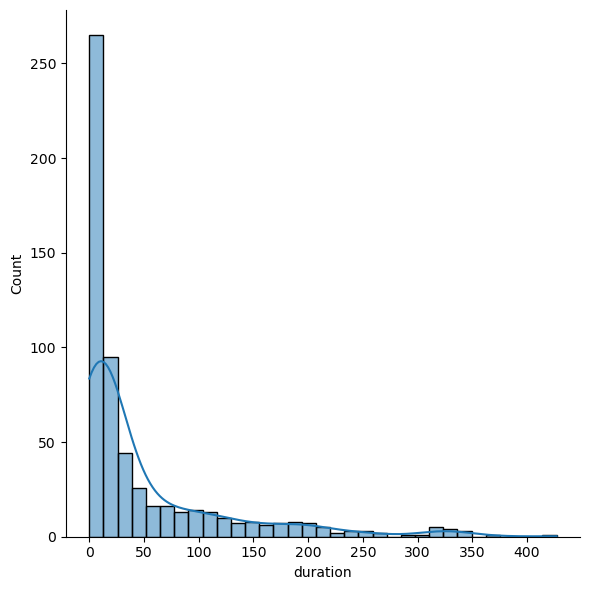

In [8]:
# 제품발송기간의 확률밀도함수와 히스토그램
sns.displot(deal['duration'],kde=True,height=6, aspect=1)
plt.xticks(np.arange(0, 430, 50)) 
plt.show()

### 6개의 비교그룹

- HS , HF , MS , MF , LS , LF

In [38]:
query = '''
SELECT *,DATEDIFF(ORDERS.order_delivered_carrier_date,ORDERS.order_approved_at) AS deliver
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_orders_dataset ORDERS ON ORDERS.order_id = ITEMS.order_id
WHERE OG.type = 'HF';
'''
HF_deliver = pd.read_sql_query(query, con=db)
HF_deliver = pd.DataFrame(HF_deliver)

query = '''
SELECT *,DATEDIFF(ORDERS.order_delivered_carrier_date,ORDERS.order_approved_at) AS deliver
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_orders_dataset ORDERS ON ORDERS.order_id = ITEMS.order_id
WHERE OG.type = 'HS';
'''
HS_deliver = pd.read_sql_query(query, con=db)
HS_deliver = pd.DataFrame(HS_deliver)

query = '''
SELECT *,DATEDIFF(ORDERS.order_delivered_carrier_date,ORDERS.order_approved_at) AS deliver
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_orders_dataset ORDERS ON ORDERS.order_id = ITEMS.order_id
WHERE OG.type = 'MF';
'''
MF_deliver = pd.read_sql_query(query, con=db)
MF_deliver = pd.DataFrame(MF_deliver)

query = '''
SELECT *,DATEDIFF(ORDERS.order_delivered_carrier_date,ORDERS.order_approved_at) AS deliver
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_orders_dataset ORDERS ON ORDERS.order_id = ITEMS.order_id
WHERE OG.type = 'MS';
'''
MS_deliver = pd.read_sql_query(query, con=db)
MS_deliver = pd.DataFrame(MS_deliver)

query = '''
SELECT *,DATEDIFF(ORDERS.order_delivered_carrier_date,ORDERS.order_approved_at) AS deliver
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_orders_dataset ORDERS ON ORDERS.order_id = ITEMS.order_id
WHERE OG.type = 'LF';
'''
LF_deliver = pd.read_sql_query(query, con=db)
LF_deliver = pd.DataFrame(LF_deliver)

query = '''
SELECT *,DATEDIFF(ORDERS.order_delivered_carrier_date,ORDERS.order_approved_at) AS deliver
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_orders_dataset ORDERS ON ORDERS.order_id = ITEMS.order_id
WHERE OG.type = 'LS';
'''
LS_deliver = pd.read_sql_query(query, con=db)
LS_deliver = pd.DataFrame(LS_deliver)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\3410871966.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HF_deliver = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\3410871966.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HS_deliver = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\3410871966.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MF_deliver = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\

### 평균 판매 건수

In [46]:
query = '''
SELECT OG.seller_id,COUNT(PRO.product_id) product_count
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_products_dataset PRO ON PRO.product_id = ITEMS.product_id
WHERE OG.type = 'HF'
GROUP BY OG.seller_id;
'''
HF_product = pd.read_sql_query(query, con=db)
HF_product = pd.DataFrame(HF_product)

query = '''
SELECT OG.seller_id,COUNT(PRO.product_id) product_count
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_products_dataset PRO ON PRO.product_id = ITEMS.product_id
WHERE OG.type = 'HS'
GROUP BY OG.seller_id;
'''
HS_product = pd.read_sql_query(query, con=db)
HS_product = pd.DataFrame(HS_product)

query = '''
SELECT OG.seller_id,COUNT(PRO.product_id) product_count
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_products_dataset PRO ON PRO.product_id = ITEMS.product_id
WHERE OG.type = 'MF'
GROUP BY OG.seller_id;
'''
MF_product = pd.read_sql_query(query, con=db)
MF_product = pd.DataFrame(MF_product)

query = '''
SELECT OG.seller_id,COUNT(PRO.product_id) product_count
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_products_dataset PRO ON PRO.product_id = ITEMS.product_id
WHERE OG.type = 'MS'
GROUP BY OG.seller_id;
'''
MS_product = pd.read_sql_query(query, con=db)
MS_product = pd.DataFrame(MS_product)

query = '''
SELECT OG.seller_id,COUNT(PRO.product_id) product_count
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_products_dataset PRO ON PRO.product_id = ITEMS.product_id
WHERE OG.type = 'LF'
GROUP BY OG.seller_id;
'''
LF_product = pd.read_sql_query(query, con=db)
LF_product = pd.DataFrame(LF_product)

query = '''
SELECT OG.seller_id,COUNT(PRO.product_id) product_count
FROM olist_group OG 
JOIN olist_ecommerce.olist_order_items_dataset ITEMS ON ITEMS.seller_id = OG.seller_id
JOIN olist_ecommerce.olist_products_dataset PRO ON PRO.product_id = ITEMS.product_id
WHERE OG.type = 'LS'
GROUP BY OG.seller_id;
'''
LS_product = pd.read_sql_query(query, con=db)
LS_product = pd.DataFrame(LS_product)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\181212584.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HF_product = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\181212584.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HS_product = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\181212584.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MF_product = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\181

In [48]:
a = ['HF','HS','MF','MS','LF','LS']
product_avg = [HF_product['product_count'].mean(),HS_product['product_count'].mean(),
              MF_product['product_count'].mean(),MS_product['product_count'].mean(),
              LF_product['product_count'].mean(),LS_product['product_count'].mean()]

product = pd.DataFrame({'type':a,'product_avg':product_avg})

In [49]:
product

,type,product_avg
0,HF,28.350877
1,HS,17.090909
2,MF,13.876106
3,MS,6.470588
4,LF,15.787879
5,LS,8.375000


### 4개의 셀러타입
- MF + LF = MLF
- MS + LS = MLS

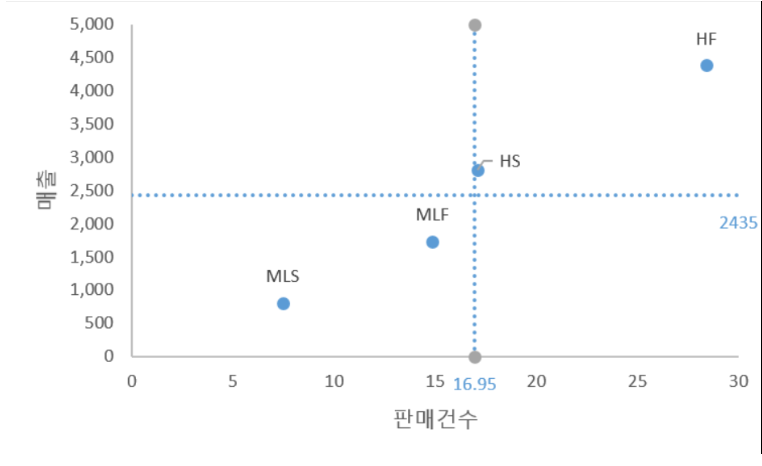

In [9]:
query = '''
SELECT * FROM olist 
WHERE lead_type IN('online_medium','online_small','online_beginner')
AND day <= 49;
'''
MLF = pd.read_sql_query(query,con=db)
MLF = pd.DataFrame(MLF)

query = '''
SELECT * FROM olist 
WHERE lead_type IN('online_medium','online_small','online_beginner')
AND day > 49;
'''
MLS = pd.read_sql_query(query,con=db)
MLS = pd.DataFrame(MLS)

query = '''
SELECT * FROM olist
WHERE lead_type IN('online_top','online_big')
AND day <= 49;
'''
HF = pd.read_sql_query(query,con=db)
HF = pd.DataFrame(HF)

query = '''
SELECT * FROM olist 
WHERE lead_type IN('online_top','online_big')
AND day > 49;
'''
HS = pd.read_sql_query(query,con=db)
HS = pd.DataFrame(HS)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2518505962.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MLF = pd.read_sql_query(query,con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2518505962.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MLS = pd.read_sql_query(query,con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2518505962.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HF = pd.read_sql_query(query,con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2518505962.py:30: UserWar

In [13]:
query = '''
SELECT * FROM olist WHERE lead_type LIKE 'online%';
'''

reseller_online = pd.read_sql_query(query,con=db)
reseller_online = pd.DataFrame(reseller_online)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\3275976777.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reseller_online = pd.read_sql_query(query,con=db)


In [15]:
# olist ecommerce와 조인하고 난 후의 리셀러(온라인)의 수 
print(len(reseller_online))
# 전체(리셀러)에서 셀러 seg별 차지하는 비율
print('MLF 비율:', round((len(MLF) / len(reseller_online))*100,2))
print('MLS 비율:', round((len(MLS) / len(reseller_online))*100,2))
print('HF 비율:', round((len(HF) / len(reseller_online))*100,2))
print('HS 비율:', round((len(HS) / len(reseller_online))*100,2))

448
MLF 비율: 53.79
MLS 비율: 21.21
HF 비율: 18.53
HS 비율: 6.47


### 발송 준비 기간

In [ ]:
a = ['HF','HS','MF','MS','LF','LS']
deliver_avg = [HF_deliver['deliver'].mean(),HS_deliver['deliver'].mean(),
              MF_deliver['deliver'].mean(),MS_deliver['deliver'].mean(),
              LF_deliver['deliver'].mean(),LS_deliver['deliver'].mean()]

deliver = pd.DataFrame({'type':a,'deliver_avg':deliver_avg})

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.


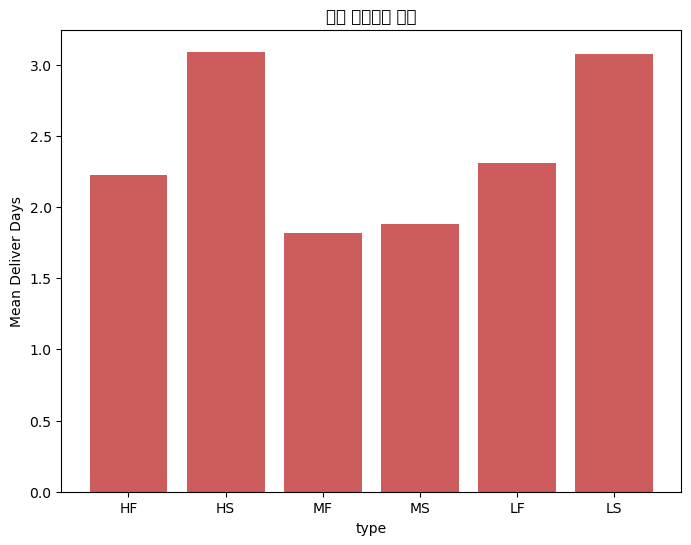

In [44]:
plt.figure(figsize=(8, 6))
plt.bar(a, deliver_avg, color='indianred')
plt.xlabel('type')
plt.ylabel('Mean Deliver Days')
plt.title('발송 준비기간 평균')

plt.show()

In [45]:
deliver

,type,deliver_avg
0,HF,2.223187
1,HS,3.090909
2,MF,1.820743
3,MS,1.881818
4,LF,2.306358
5,LS,3.074627


### 셀러타입별 유입경로

In [17]:
query = '''
SELECT *,
CASE 
    WHEN lead_type IN('online_top','online_big') AND day <= 49 THEN 'HF'
    WHEN lead_type IN('online_top','online_big') AND day > 49 THEN 'HS'
    WHEN lead_type IN('online_medium','online_top','online_big') AND day <= 49 THEN 'MLF'
    WHEN lead_type IN('online_medium','online_top','online_big') AND day > 49 THEN 'MLS'
END AS 'type'
FROM olist;
'''
df = pd.read_sql_query(query,con=db)
df = pd.DataFrame(df)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\1589180924.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query,con=db)


In [20]:
query = '''
SELECT type,origin,COUNT(origin) count FROM olist_type
WHERE LENGTH(origin) > 0 AND type = 'MLF' GROUP BY origin ORDER BY count DESC;
'''

MLF_origin = pd.read_sql_query(query, con=db)
MLF_origin = pd.DataFrame(MLF_origin)

query = '''
SELECT type,origin,COUNT(origin) count FROM olist_type
WHERE LENGTH(origin) > 0 AND type = 'MLS' GROUP BY origin ORDER BY count DESC;
'''

MLS_origin = pd.read_sql_query(query, con=db)
MLS_origin = pd.DataFrame(MLS_origin)

query = '''
SELECT type,origin,COUNT(origin) count FROM olist_type
WHERE LENGTH(origin) > 0 AND type = 'HS' GROUP BY origin ORDER BY count DESC;
'''

HS_origin = pd.read_sql_query(query, con=db)
HS_origin = pd.DataFrame(HS_origin)

query = '''
SELECT type,origin,COUNT(origin) count FROM olist_type
WHERE LENGTH(origin) > 0 AND type = 'HF' GROUP BY origin ORDER BY count DESC;
'''

HF_origin = pd.read_sql_query(query, con=db)
HF_origin = pd.DataFrame(HF_origin)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2975854837.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MLF_origin = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2975854837.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MLS_origin = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2975854837.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HS_origin = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\2

In [34]:
sum = 0
MLF_list = MLF_origin['count'].tolist()
for i in MLF_list:
    sum += i
    
avg = []
MLF_list = MLF_origin['count'].tolist()
for i in range(len(MLF_list)):
    value = round((MLF_origin['count'][i] / sum) * 100, 2)
    avg.append(value)
MLF_origin['avg'] = avg
MLF_origin
MLF_origin.drop('count', axis=1)

,type,origin,avg
0,MLF,organic_search,29.21
1,MLF,unknown,27.53
2,MLF,paid_search,21.35
3,MLF,social,7.87
4,MLF,direct_traffic,7.87
5,MLF,email,2.81
6,MLF,display,1.69
7,MLF,referral,1.12
8,MLF,other,0.56


In [35]:
sum = 0
MLS_list = MLS_origin['count'].tolist()
for i in MLS_list:
    sum += i
    
avg = []
MLS_list = MLS_origin['count'].tolist()
for i in range(len(MLS_list)):
    value = round((MLS_origin['count'][i] / sum) * 100, 2)
    avg.append(value)
MLS_origin['avg'] = avg
MLS_origin
MLS_origin.drop('count', axis=1)

,type,origin,avg
0,MLS,organic_search,34.33
1,MLS,paid_search,26.87
2,MLS,unknown,19.40
3,MLS,social,7.46
4,MLS,direct_traffic,5.97
5,MLS,email,4.48
6,MLS,referral,1.49


In [36]:
sum = 0
HF_list = HF_origin['count'].tolist()
for i in HF_list:
    sum += i
    
avg = []
HF_list = HF_origin['count'].tolist()
for i in range(len(HF_list)):
    value = round((HF_origin['count'][i] / sum) * 100, 2)
    avg.append(value)
HF_origin['avg'] = avg
HF_origin
HF_origin.drop('count', axis=1)

,type,origin,avg
0,HF,organic_search,37.18
1,HF,paid_search,21.79
2,HF,unknown,21.79
3,HF,social,6.41
4,HF,referral,6.41
5,HF,direct_traffic,3.85
6,HF,other_publicities,1.28
7,HF,other,1.28


In [37]:
sum = 0
HS_list = HS_origin['count'].tolist()
for i in HS_list:
    sum += i
    
avg = []
HS_list = HS_origin['count'].tolist()
for i in range(len(HS_list)):
    value = round((HS_origin['count'][i] / sum) * 100, 2)
    avg.append(value)
HS_origin['avg'] = avg
HS_origin
HS_origin.drop('count', axis=1)

,type,origin,avg
0,HS,organic_search,37.93
1,HS,paid_search,37.93
2,HS,social,10.34
3,HS,unknown,10.34
4,HS,direct_traffic,3.45


## 매출 평균

In [27]:
query = '''
SELECT *
FROM olist_seg SEG
JOIN sales S ON S.seller_id = SEG.seller_id;
'''

s = pd.read_sql_query(query, con=db)
s = pd.DataFrame(s)

C:\Users\rsh73\AppData\Local\Temp\ipykernel_11912\3842082394.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  s = pd.read_sql_query(query, con=db)


In [49]:
s.groupby('type')['sales_sum'].mean()

type
HF    4389.715965
HS    2805.678182
LF    2009.004545
LS     737.208750
MF    1466.238496
MS     878.325882
Name: sales_sum, dtype: float64

In [52]:
s[s['type'] == "HF"]

,mql_id,seller_id,business_type,lead_type,won_date,business_segment,origin,day,type,seller_id,sales_sum
14,009ff90f082aaa9fcd6e14caf65c7cc6,134285d1f41da5c13a756ee8142c8a4e,reseller,online_big,2018-04-03 03:00:00,car_accessories,paid_search,15,HF,134285d1f41da5c13a756ee8142c8a4e,1572.70
18,35dae000552fd88cce58a6571998738c,184725737946a1a938bbbd1a9e978103,reseller,online_big,2018-04-20 20:48:35,fashion_accessories,unknown,0,HF,184725737946a1a938bbbd1a9e978103,359.70
23,450b9ff6579ee8138f673984554e8a93,1cbd32d00d01bb8087a5eb088612fd9c,reseller,online_big,2018-05-02 14:23:32,health_beauty,organic_search,13,HF,1cbd32d00d01bb8087a5eb088612fd9c,1045.47
27,1785cff273aedbd875c814b46928ad7f,213fafb0ca06fb3d5886579c2565791b,reseller,online_big,2018-05-17 18:11:29,audio_video_electronics,,9,HF,213fafb0ca06fb3d5886579c2565791b,189.70
30,3559ec2c1c4f29266d1c1eb0f1164549,28f10b1c5e5abb9d4857745bede6147c,reseller,online_big,2018-04-10 14:05:56,audio_video_electronics,social,1,HF,28f10b1c5e5abb9d4857745bede6147c,835.00
34,d25814a309be54d1d2279a4ff921ea28,2d42ebcda99fd55f6f4bc2f1ca035d50,reseller,online_big,2018-04-11 03:00:00,home_decor,social,45,HF,2d42ebcda99fd55f6f4bc2f1ca035d50,921.50
37,e5f15cc640c8a7408103dd190ced966c,30a81d8cf85fb2ada1b1b094c9583a95,reseller,online_top,2018-01-19 16:51:28,pet,unknown,16,HF,30a81d8cf85fb2ada1b1b094c9583a95,1245.42
39,1ce04284ef15be769958c668292573b8,33cbbec1e7e1044aaf11d152172c776f,reseller,online_big,2018-03-06 13:27:32,household_utilities,unknown,31,HF,33cbbec1e7e1044aaf11d152172c776f,730.67
44,299d8968ef74c5086cb3ee21f13ed27a,377bc18334c78dd2f1535ef22a3ad225,reseller,online_big,2018-03-07 22:08:32,car_accessories,unknown,28,HF,377bc18334c78dd2f1535ef22a3ad225,135.98
45,2dfbe1c802c78a8b1f75ef13b70c1124,382229d1e840115ffe3dbf5ff460e417,reseller,online_big,2018-03-27 19:15:09,household_utilities,organic_search,5,HF,382229d1e840115ffe3dbf5ff460e417,4136.86


# 리드 행동 유형을 비교그룹 기준에 넣을지에 대한 고찰

- 전체에서 결측치가 차지하는 비율이 21 % 로고 결측 개수가 2위
- mbti와 같은 성격유형 즉, 성향이기 때문에 비교그룹 기준에 객관적인 지표가 되지 못할 것 같아 넣지 않음 ( 적합하지 않을거라 생각 )

In [62]:
query = ''' SELECT D.lead_behaviour_profile profile,COUNT(*) count 
FROM olist_marketing.olist_closed_deals D
JOIN olist_marketing.olist_marketing_qualified_leads M ON M.mql_id = D.mql_id
GROUP BY D.lead_behaviour_profile;'''
profile = pd.read_sql_query(query, con=db)
profile = pd.DataFrame(profile)

c:\users\rsh73\appdata\local\programs\python\python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [61]:
profile.sort_values(by='count',ascending=False)

,profile,count
0,cat,406
2,None,177
1,eagle,123
3,wolf,95
4,shark,24
5,"cat, wolf",8
6,"eagle, wolf",3
8,"eagle, cat",3
7,"shark, cat",1
9,"shark, wolf",1


In [53]:
sum = 0
for i in range(10):
    sum += profile['count'][i] 

In [58]:
# 전체 데이터에서 공백이 차지하는 비율 
(177 / sum)*100

21.046373365041617

In [82]:
# DISC가 우리가 생각한 기준과 관련이 있는지 확인
query = '''SELECT D.lead_behaviour_profile profile,COUNT(*) count, AVG(DATEDIFF(D.won_date,M.first_contact_date)) closed_deals_avg
FROM olist_marketing.olist_closed_deals D
JOIN olist_marketing.olist_marketing_qualified_leads M ON M.mql_id = D.mql_id
GROUP BY D.lead_behaviour_profile;'''
profile_closde_deals_avg = pd.read_sql_query(query, con=db)
profile_closde_deals_avg = pd.DataFrame(profile_closde_deals_avg)

profile_closde_deals_avg.sort_values(by='closed_deals_avg')

c:\users\rsh73\appdata\local\programs\python\python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,profile,count,closed_deals_avg
1,eagle,123,35.9756
2,None,177,39.3503
0,cat,406,40.8005
4,shark,24,75.3750
3,wolf,95,83.9158
6,"eagle, wolf",3,149.3333
7,"shark, cat",1,181.0000
5,"cat, wolf",8,185.7500
8,"eagle, cat",3,199.0000
9,"shark, wolf",1,341.0000


In [52]:
from scipy.stats import pearsonr

review_count = np.array([110, 26, 62, 980, 290, 788])
review_avg = np.array([4.69, 4.25, 4.13, 3.84, 3.83, 3.71])

#상관 계수
correlation_coefficient, p_value = pearsonr(review_count, review_avg)

print("상관 계수:", correlation_coefficient)
print("p-value:", p_value)

상관 계수: -0.6918340077609308
p-value: 0.12781672939541602


### 첫 판매까지 걸린 시간

In [68]:
# 원래대로 2개로 나눠서
query = '''
SELECT AVG(DATEDIFF(ORD.first_order, SG.won_date)) avg
FROM (SELECT seller_id, business_type, lead_type, won_date
FROM olist_marketing.olist_closed_deals C
JOIN olist_marketing.olist_marketing_qualified_leads M
ON C.mql_id = M.mql_id
WHERE business_type = 'reseller' AND lead_type IN('online_big','online_top') AND
DATEDIFF(C.won_date, M.first_contact_date) <= 49) AS SG
JOIN (SELECT seller_id, MIN(order_purchase_timestamp) AS first_order
FROM olist_ecommerce.olist_order_items_dataset OI
JOIN olist_ecommerce.olist_orders_dataset O
ON OI.order_id = O.order_id
WHERE order_status = 'delivered'
GROUP BY seller_id) AS ORD
ON ORD.seller_id = SG.seller_id;
'''

HF_sell = pd.read_sql_query(query, con=db)
HF_sell = pd.DataFrame(HF_sell) 

query = '''
SELECT AVG(DATEDIFF(ORD.first_order, SG.won_date)) avg
FROM (SELECT seller_id, business_type, lead_type, won_date
FROM olist_marketing.olist_closed_deals C
JOIN olist_marketing.olist_marketing_qualified_leads M
ON C.mql_id = M.mql_id
WHERE business_type = 'reseller' AND lead_type IN('online_big','online_top') AND
DATEDIFF(C.won_date, M.first_contact_date) > 50) AS SG
JOIN (SELECT seller_id, MIN(order_purchase_timestamp) AS first_order
FROM olist_ecommerce.olist_order_items_dataset OI
JOIN olist_ecommerce.olist_orders_dataset O
ON OI.order_id = O.order_id
WHERE order_status = 'delivered'
GROUP BY seller_id) AS ORD
ON ORD.seller_id = SG.seller_id;
'''

HS_sell = pd.read_sql_query(query, con=db)
HS_sell = pd.DataFrame(HS_sell) 

query = '''
SELECT AVG(DATEDIFF(ORD.first_order, SG.won_date)) avg
FROM (SELECT seller_id, business_type, lead_type, won_date
FROM olist_marketing.olist_closed_deals C
JOIN olist_marketing.olist_marketing_qualified_leads M
ON C.mql_id = M.mql_id
WHERE business_type = 'reseller' AND lead_type IN('online_medium','online_samll','online_beginner') AND
DATEDIFF(C.won_date, M.first_contact_date) <= 49) AS SG
JOIN (SELECT seller_id, MIN(order_purchase_timestamp) AS first_order
FROM olist_ecommerce.olist_order_items_dataset OI
JOIN olist_ecommerce.olist_orders_dataset O
ON OI.order_id = O.order_id
WHERE order_status = 'delivered'
GROUP BY seller_id) AS ORD
ON ORD.seller_id = SG.seller_id;
'''

MLF_sell = pd.read_sql_query(query, con=db)
MLF_sell = pd.DataFrame(MLF_sell) 

query = '''
SELECT AVG(DATEDIFF(ORD.first_order, SG.won_date)) avg
FROM (SELECT seller_id, business_type, lead_type, won_date
FROM olist_marketing.olist_closed_deals C
JOIN olist_marketing.olist_marketing_qualified_leads M
ON C.mql_id = M.mql_id
WHERE business_type = 'reseller' AND lead_type IN('online_medium','online_samll','online_beginner') AND
DATEDIFF(C.won_date, M.first_contact_date) > 50) AS SG
JOIN (SELECT seller_id, MIN(order_purchase_timestamp) AS first_order
FROM olist_ecommerce.olist_order_items_dataset OI
JOIN olist_ecommerce.olist_orders_dataset O
ON OI.order_id = O.order_id
WHERE order_status = 'delivered'
GROUP BY seller_id) AS ORD
ON ORD.seller_id = SG.seller_id;
'''

MLS_sell = pd.read_sql_query(query, con=db)
MLS_sell = pd.DataFrame(MLS_sell) 

C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\1569512079.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HF_sell = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\1569512079.py:39: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HS_sell = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\1569512079.py:59: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  MLF_sell = pd.read_sql_query(query, con=db)
C:\Users\rsh73\AppData\Local\Temp\ipykernel_12952\1569512

In [69]:
a = ['HF','HS','MLF','MLS']
sell_time_avg = [HF_sell['avg'][0],HS_sell['avg'][0],
                MLF_sell['avg'][0],MLS_sell['avg'][0]]
sell = pd.DataFrame({'type':a,'sell_time_avg':sell_time_avg})

In [70]:
sell

,type,sell_time_avg
0,HF,39.1429
1,HS,29.0909
2,MLF,53.1732
3,MLS,41.0000


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\rsh73\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rsh73\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rsh73\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rsh73\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44620 (\N{HANGUL SYLLABLE GGA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rsh73\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) 

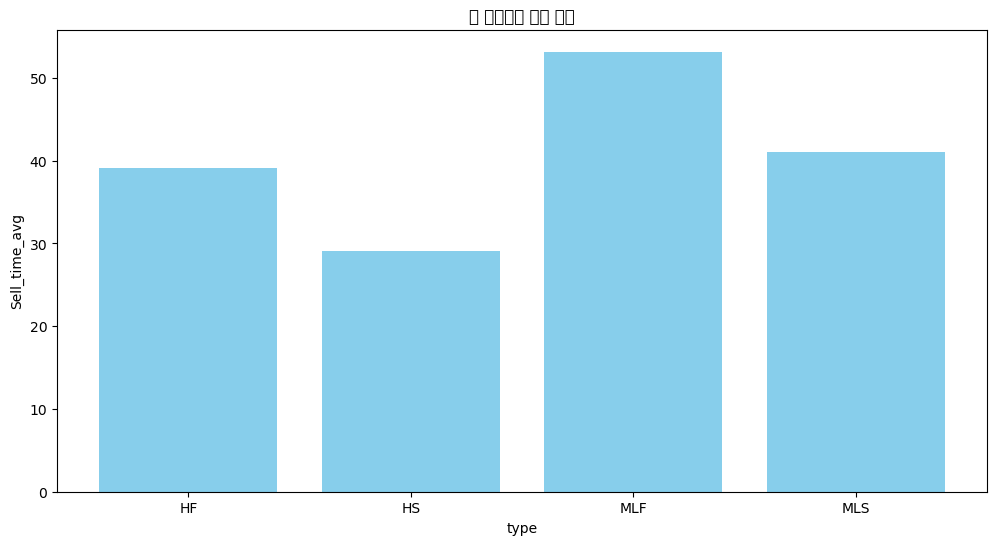

In [71]:
plt.figure(figsize=(12, 6))
plt.bar(a, sell_time_avg, color='skyblue')
plt.xlabel('type')
plt.ylabel('Sell_time_avg')
plt.title('첫 판매까지 걸린 시간')
plt.show()